# `phase.py`

## Setup

In [1]:
import math
import sys

import einops
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append('../scripts/')

from utils import set_seaborn_whitegrid_ticks
from phase import unwrap

set_seaborn_whitegrid_ticks()

## `unwrap`

It is assumed that there is no unwrapping before and after NaN.

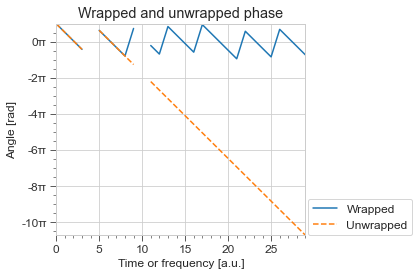

In [2]:
nan_indice = [4, 10]
p = (torch.linspace(np.pi-1e-5, -40, 30) + np.pi) % (2*np.pi) - np.pi
p[nan_indice] = np.nan
up = unwrap(p).detach().cpu().numpy()

fig, ax = plt.subplots(1, 1)

ax.plot(p, label='Wrapped')
ax.plot(up, linestyle='--', label='Unwrapped')
ax.set(
    title='Wrapped and unwrapped phase',
    xlabel='Time or frequency [a.u.]',
    ylabel='Angle [rad]',
    yticks=np.arange(-100, 100, 2)*np.pi,
    yticklabels=[f'{i}π' for i in range(-100, 100, 2)],
    xlim=(0, p.shape[0]-1),
    ylim=(np.nanmin(up), np.nanmax(up)),
);
ax.legend(loc=(1.01, 0), frameon=True)
fig.tight_layout()

***

*End*